In [49]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from fitter import Fitter, get_common_distributions, get_distributions
import matplotlib.pyplot as plt

In [26]:
dataset = pd.read_csv('churn_probability.csv')
dataset.head()

,SOURCE_COUNTRY,WAREHOUSE,SEQUENTIAL,DIFF
0,MEXICO,Tlalnepantla,2,26.041667
1,MEXICO,Tlalnepantla,3,22.708333
2,MEXICO,Tlalnepantla,4,26.041667
3,COLOMBIA,Bodega Medellin,2,1.083333
4,COLOMBIA,Bodega Medellin,3,18.958333


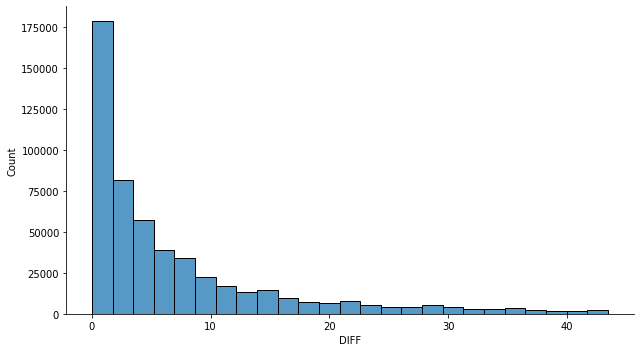

In [30]:
dataset_histogram = dataset[(np.abs(stats.zscore(dataset['DIFF'])) < 1.5)]
sns.displot(data=dataset_histogram, x="DIFF", kind="hist", bins = 25, aspect = 1.8)

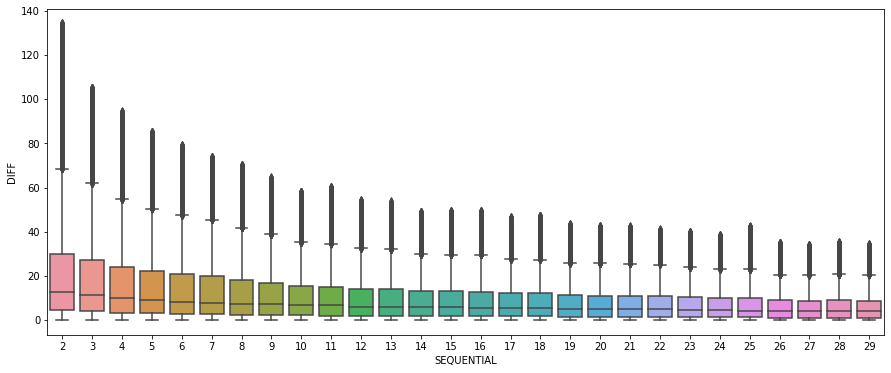

In [51]:
def is_outlier(s):
    lower_limit = s.mean() - (s.std() * 2)
    upper_limit = s.mean() + (s.std() * 2)
    return ~s.between(lower_limit, upper_limit)

dataset_boxplot = dataset[dataset['SEQUENTIAL'] < 30 ]
dataset_boxplot = dataset_boxplot[~dataset_boxplot.groupby('SEQUENTIAL')['DIFF'].apply(is_outlier)]
dataset_boxplot.head()

# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(15, 6))

sns.boxplot(data=dataset_boxplot, x='SEQUENTIAL', y='DIFF', width=0.8, whis=1.5)
plt.show()